# The introduction of dataset

The Academy Awards, also officially and popularly known as the Oscars, are awards for artistic and technical merit in the film industry. The various category winners are awarded a copy of a golden statuette, officially called the "Academy Award of Merit", although more commonly referred to by its nickname "Oscar". The statuette depicts a knight rendered in Art Deco style.This file contains a scrape of The Academy Awards Database, recorded of past Academy Award winners and nominees between 1927 and 2023.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Change Display Settings

In [21]:
pd.options.display.max_rows = 200

# Get data

The dataset captures details about film awards, including the years of film production, awards ceremonies, different award categories, nominee names, film names, and whether each nominee was a winner or not.

In [22]:
df= pd.read_csv('Desktop/the_oscar_award.csv')

In [23]:
df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10760,2022,2023,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,True
10761,2022,2023,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",NaN,True
10762,2022,2023,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",NaN,True
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,True


# Overview

The dataset has a total of 10,765 entries, meaning there are 10,765 rows of data.
The 'name' column has 4 missing values (non-null count is 10,761 out of 10,765).
The 'film' column has 315 missing values (non-null count is 10,450 out of 10,765).

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.3+ KB


# Generate descriptive statistics for all the columns in the data

In [27]:
df.describe(include='all')

,year_film,year_ceremony,ceremony,category,name,film,winner
count,10765.000000,10765.000000,10765.000000,10765,10761,10450,10765
unique,NaN,NaN,NaN,115,6952,4991,2
top,NaN,NaN,NaN,DIRECTING,Metro-Goldwyn-Mayer,A Star Is Born,False
freq,NaN,NaN,NaN,464,64,25,8327
mean,1976.074222,1977.074222,49.098932,NaN,NaN,NaN,NaN
std,27.055841,27.055841,27.013986,NaN,NaN,NaN,NaN
min,1927.000000,1928.000000,1.000000,NaN,NaN,NaN,NaN
25%,1952.000000,1953.000000,25.000000,NaN,NaN,NaN,NaN
50%,1975.000000,1976.000000,48.000000,NaN,NaN,NaN,NaN
75%,2000.000000,2001.000000,73.000000,NaN,NaN,NaN,NaN


# Winners and Nominees by year

By comparing the number of nominations and actual awards, we can observe that between 1925 and 1937, the number of awards remained around 20. However, from then until 2022, the number of awards stabilized at around 30. In terms of nominations, the lowest point was between 1927 and 1934, at around 20 nominations. Starting from 1935, the number of nominations increased each year, reaching its peak in 1943 at 150 nominations, indicating that only about 1/7 of the nominees had the opportunity to win. Finally, from 1946 onwards, the number of nominations and awards gradually stabilized at around 100 and 20, respectively. This suggests that nominees have approximately a 1/5 chance of winning.

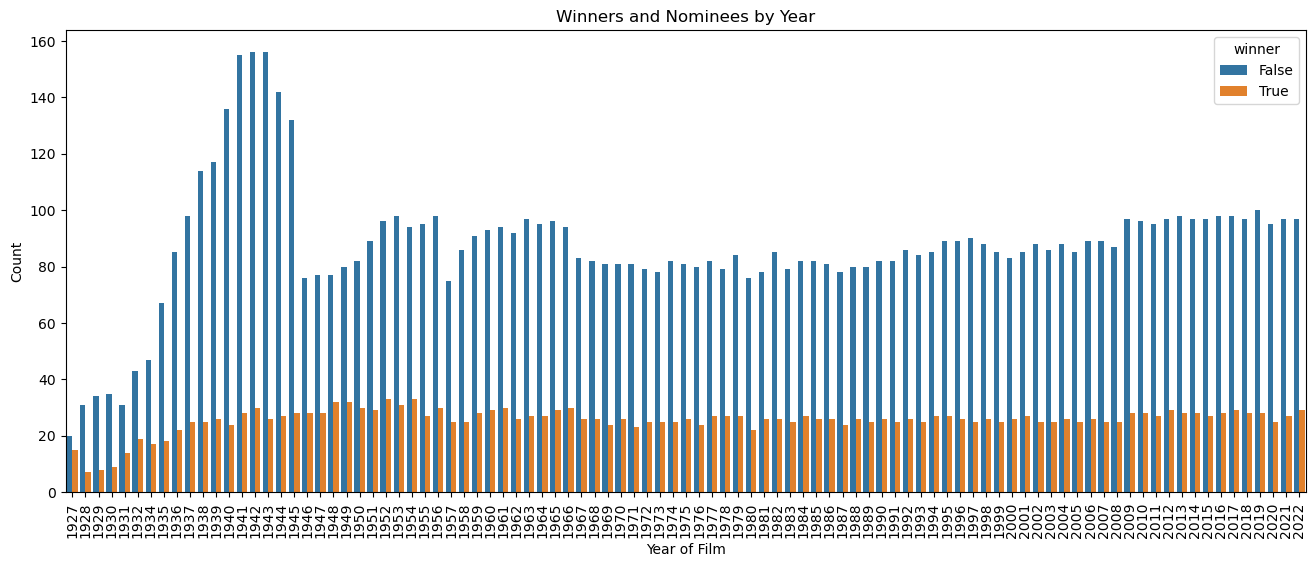

In [44]:
# Create a bar plot using Seaborn
plt.figure(figsize=(16, 6))  # Adjust the figure size if needed
ax = sns.countplot(data=df, x='year_film', hue='winner')

# Adding labels and title
plt.xlabel('Year of Film')
plt.ylabel('Count')
plt.title('Winners and Nominees by Year')

# Set x-axis ticks to include all years
ax.set_xticks(range(len(df['year_film'].unique())))
ax.set_xticklabels(sorted(df['year_film'].unique()), rotation=90)

# Display the plot
plt.show()


# Count Plot of Nominee Categories:

From the analysis of the chart data, we can observe that in the category of 'outstanding production,' the number of nominations exceeds 50, but the actual number of awards is less than 10, indicating intense competition in this category. For the remaining awards, the winning ratio is approximately 1/2. A notable exception is in the 'comedy picture' directing category, where the number of nominations equals the number of awards, suggesting that being nominated in this category significantly increases the probability of winning.

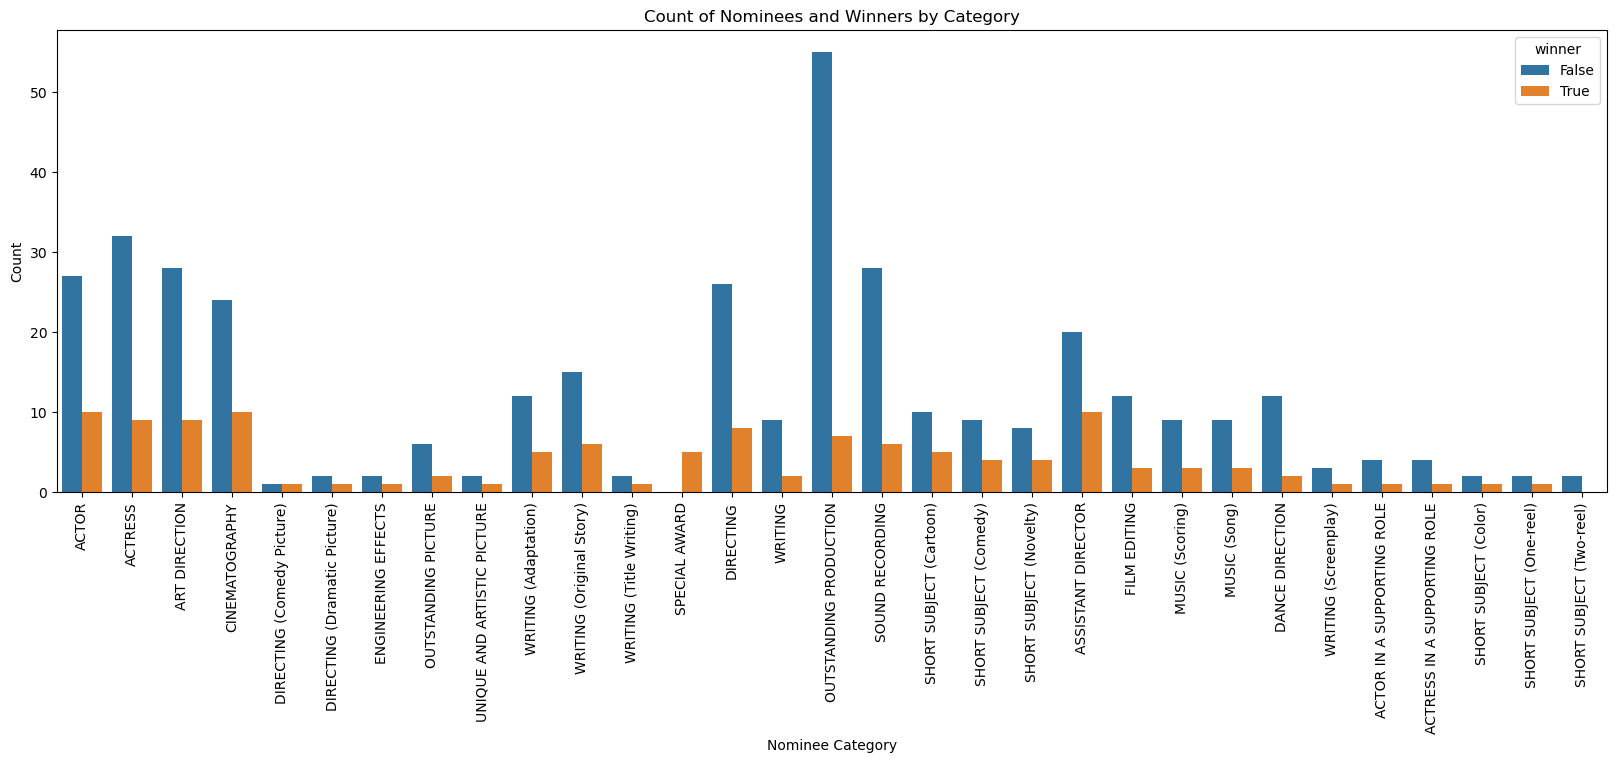

In [46]:
# Create a count plot with 'hue' for winner
plt.figure(figsize=(20, 6))
sns.countplot(data=df[:500], x='category', hue='winner')

# Adding labels and title
plt.xlabel('Nominee Category')
plt.ylabel('Count')
plt.title('Count of Nominees and Winners by Category')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


# probability density of nominations across different years.

It is an analysis of how nominations for a particular category or award are distributed across various years. It aims to understand the likelihood or probability density of receiving a nomination in different years. We can see that the concentration was highest in the year 1940, indicating that films were more likely to receive nominations in that year. Although there is a declining trend between 1940 and 2020, it still remains in a period of relatively high concentration, suggesting a prosperous development in the film industry during this period.

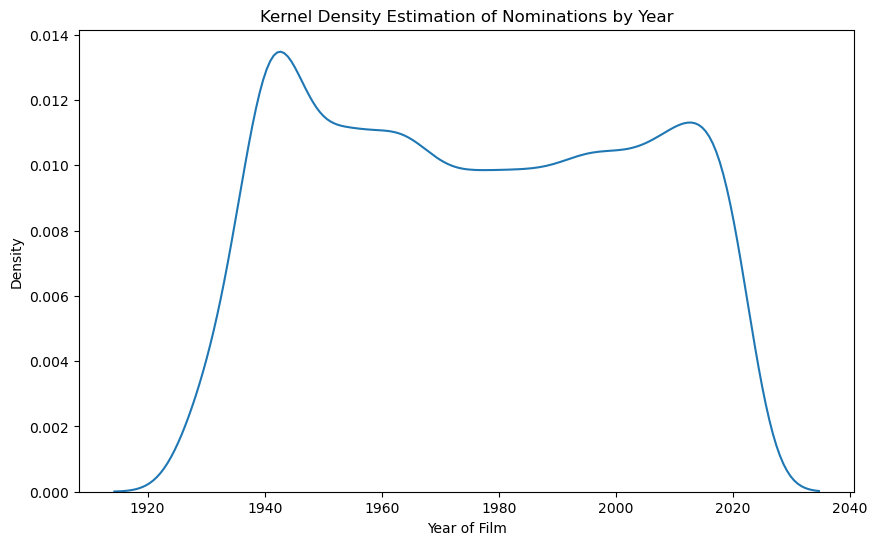

In [35]:
# Create a KDE plot using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='year_film')

# Adding labels and title
plt.xlabel('Year of Film')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Nominations by Year')

# Display the plot
plt.show()